In [2]:
import pandas as pd
import math
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [89]:
df = pd.read_json('./Downloads/data_analysis.json')

In [90]:
df.head()

,address,category_code,city,headcount,name,phone,revenue,state,time_in_business,zip
0,10085 SCRIPPS RANCH CT STE A,44420000,SAN DIEGO,50 to 99,AMD CUSTOM,3123628000,$20 to 50 Million,CA,10+ years,92131
1,2566 SHALLOWFORD RD NE STE 104 # 302,31490000,ATLANTA,1 to 4,Real Hope Real Estate Inc,None,"Less Than $500,000",GA,10+ years,30345
2,212 E MAIN ST,53120000,NEOSHO,1 to 4,Jimmy Sexton Photography,4046331779,"Less Than $500,000",MO,10+ years,64850
3,6032 CHEROKEE DR,54000000,CINCINNATI,1 to 4,YOU'RE ART,4174513798,"Less Than $500,000",OH,10+ years,45243
4,1315 N WOOSTER AVE,54100000,STRASBURG,1 to 4,Hayberg Restoration Network LLC,5135612584,"$500,000 to $1 Million",OH,10+ years,44680


In [269]:
df.shape

(1000000, 10)

### 1. Fill Rate: For each field, how many records have a value

In [91]:
df.replace('none', np.nan, inplace = True)
df.replace('null', np.nan, inplace = True)
df.notnull().sum()/df.shape[0]

address             0.999958
category_code       0.999963
city                0.999955
headcount           0.962323
name                0.999963
phone               0.590856
revenue             0.943058
state               0.999957
time_in_business    0.916094
zip                 0.999951
dtype: float64

In [132]:
sum(df.headcount == 'none')

0

- address: address has to contain either letter
- category_code: nacis code, after checking the pattern, it needs to be a series of number has length 8
- city: city needs to contain letter
- headcount: needs to contain number or letter
- name: needs to contain letter or number
- phone: needs to contain number has length at least 10
- revenue: needs to contain number or letter
- state: needs to contain letter
- time_in_business: needs to contain letter or number
- zip: needs to contain number has length at least 5

In [133]:
df.category_code = df.category_code.astype(str)
df.zip = df.zip.astype(str)
df.city = df.city.astype(str)
df.phone = df.phone.astype(str)
df.state.replace(['PR', 'VI'], np.nan, inplace = True)
print 'address', df.address.str.contains(pat ='[A-Za-z]').sum()/ float(df.shape[0])
print 'category_code', sum(df.category_code.apply(lambda x: True if len(x) == 8 else False))/float(df.shape[0])
print 'city', df.city.str.contains(pat ='[A-Za-z]').sum()/ float(df.shape[0])
print 'headcount', df.headcount.str.contains(pat ='[A-Za-z0-9]').sum()/ float(df.shape[0])
print 'name', df.name.str.contains(pat ='[A-Za-z0-9]').sum()/ float(df.shape[0])
print 'phone', sum(df[df.phone.str.contains(pat ='[0-9]', na = False)].phone.apply(lambda x: True if len(x) >= 10 else False))/ float(df.shape[0])
print 'revenue', df.revenue.str.contains(pat ='[A-Za-z0-9]').sum()/ float(df.shape[0])
print 'state', df.state.str.contains(pat ='[A-Za-z]').sum()/ float(df.shape[0])
print 'time_in_business', df.time_in_business.str.contains(pat ='[A-Za-z0-9]').sum()/ float(df.shape[0])
print 'zip', sum(df.zip.apply(lambda x: True if len(x) >= 5 else False))/float(df.shape[0])
#df.apply(lambda x: x.str.contains(pat ='[A-Za-z0-9]').sum()/ float(df.shape[0]))

address 0.999898
category_code 0.99991
city 0.99994
headcount 0.962288
name 0.999926
phone 0.590798
revenue 0.943016
state 0.999893
time_in_business 0.916063
zip 0.953374


### 3. Cardinality: The cardinality of each field

In [134]:
df_ph = df[df.phone.str.contains(pat ='[0-9]', na = False)]
print 'address', len(set(df[df.address.str.contains(pat ='[A-Za-z]', na = False)].address))
print 'category_code', len(set(df[df.category_code.apply(lambda x: True if len(x) == 8 else False)].category_code))
print 'city', len(set(df[df.city.str.contains(pat ='[A-Za-z]', na = False)].city))
print 'headcount', len(set(df[df.headcount.str.contains(pat ='[A-Za-z0-9]', na = False)].headcount))
print 'name', len(set(df[df.name.str.contains(pat ='[A-Za-z0-9]', na = False)].name))
print 'phone', len(set(df_ph[df_ph.phone.apply(lambda x: True if len(x) >= 10 else False)].phone))
print 'revenue', len(set(df[df.revenue.str.contains(pat ='[A-Za-z0-9]', na = False)].revenue))
print 'state', len(set(df[df.state.str.contains(pat ='[A-Za-z]', na = False)].state))
print 'time_in_business', len(set(df[df.time_in_business.str.contains(pat ='[A-Za-z0-9]', na = False)].time_in_business))
print 'zip', len(set(df[df.zip.apply(lambda x: True if len(x) >= 5 else False)].zip))
#df.apply(lambda x: len(set(x[x.str.contains(pat ='[A-Za-z0-9]', na = False)])))

address 892114
category_code 1178
city 13716
headcount 5
name 890718
phone 575148
revenue 12
state 51
time_in_business 6
zip 24410


### 4. Insights
- check duplicate pattern
- check missing values pattern
- business profile: revenue versus years in business
- industry segment: naics code versus revenue

In [135]:
# print out the valid input for each field
print 'address', df.address.str.contains(pat ='[A-Za-z]').sum()
print 'category_code', sum(df.category_code.apply(lambda x: True if len(x) == 8 else False))
print 'city', df.city.str.contains(pat ='[A-Za-z]').sum()
print 'headcount', df.headcount.str.contains(pat ='[A-Za-z0-9]').sum()
print 'name', df.name.str.contains(pat ='[A-Za-z0-9]').sum()
print 'phone',sum(df[df.phone.str.contains(pat ='[0-9]', na = False)].phone.apply(lambda x: True if len(x) >= 10 else False))
print 'revenue', df.revenue.str.contains(pat ='[A-Za-z0-9]').sum()
print 'state', df.state.str.contains(pat ='[A-Za-z]').sum()
print 'time_in_business', df.time_in_business.str.contains(pat ='[A-Za-z0-9]').sum()
print 'zip', sum(df.zip.apply(lambda x: True if len(x) >= 5 else False))

address 999898
category_code 999910
city 999940
headcount 962288
name 999926
phone 590798
revenue 943016
state 999893
time_in_business 916063
zip 953374


In [72]:
# some examples of duplicate for phone number
bb = df[df.phone.str.contains(pat ='[1-9]', na = False)]
#bb.phone.duplicated().sum()
bb[bb.phone.duplicated(keep = False)].sort_values('phone').head()

,address,category_code,city,headcount,name,phone,revenue,state,time_in_business,zip
400973,656 AVONMORE DR,52200000,FORT MILL,< 50,Kusch's Automotive,(703) 234-4646,"Less Than $500,000",SC,10+ years,29715
330484,49 KIHAPAI ST,42490000,KAILUA,50 to 250,Mohawk Lifts Of Pa Inc,(703) 234-4646,$5 to 10 Million,HI,6-10 years,96734
996012,1201 N 10TH ST,54100000,ARKANSAS CITY,< 50,GIBSON REX S DDS,2012161500,$5 to 10 Million,KS,10+ years,67005
287419,5967 SW 29TH ST STE 260,81111103,TOPEKA,< 50,FUSON PONTIAC BUICK CADILLAC GMC,2012161500,"Less Than $500,000",KS,10+ years,66614
802041,13316 EVERGREEN WAY,23611600,AUSTIN,< 50,Mc Kinnon Family Golf Shop,2012170400,"Less Than $500,000",TX,10+ years,78737


In [73]:
# some examples of duplicate for address
bb = df[df.address.str.contains(pat ='[A-Za-z]', na = False)]
bb[bb.address.duplicated(keep = False)].sort_values('address').head()

,address,category_code,city,headcount,name,phone,revenue,state,time_in_business,zip
645092,016 KEARNS RD,62130000,SNOWMASS VILLAGE,< 50,Billings Fire Department,9787745887,"Less Than $500,000",CO,10+ years,81615
906747,016 KEARNS RD,81000000,SNOWMASS VILLAGE,< 50,Symes Saab,None,"$500,000 to $1 Million",CO,10+ years,81615
293874,0224 SW HAMILTON ST STE 201,62110000,PORTLAND,< 50,Adonai Healthcare Services,2313473931,$5 to 10 Million,OR,6-10 years,97239
740695,0224 SW HAMILTON ST STE 201,61131000,PORTLAND,50 to 250,5th Street Restaurant & Bar Supply,None,$1 to 2.5 Million,OR,6-10 years,97239
864767,0245 SW BANCROFT ST,61169900,PORTLAND,< 50,Anaheim Hills Golf Course,None,"Less Than $500,000",OR,10+ years,97239


In [99]:
# check the correlation between missing phone number and headcount
df['phone_flag'] = df.phone.apply(lambda x: True if str.isdigit(str(x)) else False)
df_head = df[~df['headcount'].isin(['0', 0, "", " "])]
#df_head = df_head[df_head.headcount.notnull()]
aa = df_head.pivot_table(values='name', index='headcount', columns='phone_flag', 
                         aggfunc=lambda x: len(x.unique()), fill_value = 0)
aa['tot'] = aa.apply(lambda x: x.sum(), axis = 1)
aa = aa.apply(lambda x: x/x['tot']* 100, axis = 1)
del aa['tot']
aa = aa.round(0)
aa


phone_flag,False,True
headcount,,
1 to 4,42.0,58.0
10 to 19,42.0,58.0
100 to 249,42.0,58.0
20 to 49,42.0,58.0
250 to 499,41.0,59.0
5 to 9,42.0,58.0
50 to 99,42.0,58.0
500 to 999,42.0,58.0
"Over 1,000",42.0,58.0


In [102]:
# check the correlation between missing phone number and years in business
df_biz = df[~df.time_in_business.isin(['0', 0, " ", ""])]
#df_biz = df_biz[df_biz.time_in_business.notnull()]
aa = df_biz.pivot_table(values='name', columns='phone_flag', index='time_in_business', 
                         aggfunc=lambda x: len(x.unique()), fill_value = 0)
aa['tot'] = aa.apply(lambda x: x.sum(), axis = 1)
aa = aa.apply(lambda x: x/x['tot']* 100, axis = 1)
del aa['tot']
aa = aa.round(0)
aa


phone_flag,False,True
time_in_business,,
1-2 years,42.0,58.0
10+ years,42.0,58.0
3-5 years,42.0,58.0
6-10 years,42.0,58.0
Less than a year,0.0,100.0


In [110]:
# check the correlation between missing phone number and state
df_st = df[df['state'].str.contains(pat ='[A-Za-z]', na = False)]
aa = df_st.pivot_table(values='name', index='state', columns='phone_flag', 
                         aggfunc=lambda x: len(x.unique()), fill_value=0)
aa['tot'] = aa.apply(lambda x: x.sum(), axis = 1)
aa = aa.apply(lambda x: x/x['tot']* 100, axis = 1)
del aa['tot']
aa = aa.round(0)
aa

phone_flag,False,True
state,,
AK,41.0,59.0
AL,42.0,58.0
AR,42.0,58.0
AZ,42.0,58.0
CA,42.0,58.0
CO,42.0,58.0
CT,42.0,58.0
DC,43.0,57.0
DE,42.0,58.0


In [104]:
df_re = df[~df.revenue.isin(['0', ""," ", 0])]
aa = df_re.pivot_table(values='name', columns='phone_flag', index='revenue', 
                         aggfunc=lambda x: len(x.unique()), fill_value = 0)
aa['tot'] = aa.apply(lambda x: x.sum(), axis = 1)
aa = aa.apply(lambda x: x/x['tot']* 100, axis = 1)
del aa['tot']
aa = aa.round(0)
aa

phone_flag,False,True
revenue,,
$1 to 2.5 Million,42.0,58.0
$10 to 20 Million,42.0,58.0
$100 to 500 Million,43.0,57.0
$2.5 to 5 Million,42.0,58.0
$20 to 50 Million,42.0,58.0
$5 to 10 Million,42.0,58.0
$50 to 100 Million,42.0,58.0
"$500,000 to $1 Million",42.0,58.0
"Less Than $500,000",42.0,58.0


- Secondly, I am interested in segment business size according to the headcount. Since most of the Radius's customers are small to medium size of business, so let's focus on insights of small businesses. I choose less than 250 headcount as the group for the analysis

In [136]:
df['headcount'].replace(['1 to 4', '5 to 9', '10 to 19', '20 to 49'], '< 50', inplace = True)
df['headcount'].replace(['50 to 99', '100 to 249'], '50 to 250', inplace = True)
df['headcount'].replace(['250 to 499', '500 to 999'], '250 to 1000', inplace = True)
df['headcount'].replace('Over 1,000', '> 1000', inplace = True)

In [137]:
temp = df[df.headcount.isin(['< 50', '50 to 250', '250 to 1000', '> 1000'])]
temp[['headcount', 'name']].groupby('headcount').name.nunique()

headcount
250 to 1000     16148
50 to 250       93103
< 50           757578
> 1000           5556
Name: name, dtype: int64

- As we can see from the business headcount, the majorities of business are less than 50. In the next step, I am interested in looking at the pivot table of revenue versus years in business. We want to understand what are the small business profiles look like
- from the heatmap, we can see for small business, the majorities are in business for more than 10 years and revenue are less than 2.5 million, So there are some potential there to help them grow their business


In [138]:
temp =  temp[temp.headcount.isin(['< 50', '50 to 250'])]
temp_re_biz = temp[(temp.revenue.str.contains(pat ='[A-Za-z]', na = False)) & (temp.time_in_business.str.contains(pat ='[A-Za-z]', na = False))]
temp_re_biz.revenue.replace('$500,000 to $1 Million', '$500,000 to 1 Million', inplace = True)

aa = temp_re_biz.pivot_table(values='name', index='revenue', columns='time_in_business', 
                         aggfunc=lambda x: len(x.unique()))
column_order = ['1-2 years', '3-5 years', '6-10 years', '10+ years']
row_order = ['Less Than $500,000', '$500,000 to 1 Million', '$1 to 2.5 Million', '$2.5 to 5 Million',
            '$5 to 10 Million', '$10 to 20 Million', '$20 to 50 Million', '$50 to 100 Million', '$100 to 500 Million',
            'Over $500 Million', 'Over $1 Billion']
aa = aa.reindex_axis(column_order, axis=1)
aa = aa.reindex_axis(row_order, axis=0)
aa = aa/780687.0 * 100
aa.round(0)

time_in_business,1-2 years,3-5 years,6-10 years,10+ years
revenue,,,,
"Less Than $500,000",1.0,1.0,4.0,28.0
"$500,000 to 1 Million",0.0,1.0,2.0,13.0
$1 to 2.5 Million,0.0,1.0,2.0,15.0
$2.5 to 5 Million,0.0,0.0,1.0,9.0
$5 to 10 Million,0.0,0.0,1.0,7.0
$10 to 20 Million,0.0,0.0,1.0,4.0
$20 to 50 Million,0.0,0.0,0.0,3.0
$50 to 100 Million,0.0,0.0,0.0,1.0
$100 to 500 Million,0.0,0.0,0.0,1.0


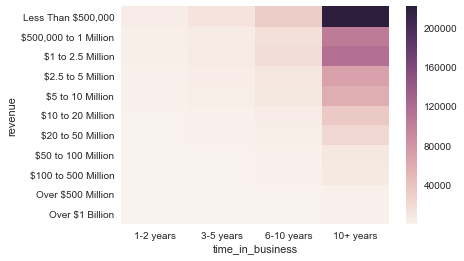

In [147]:
sns.heatmap(aa)

- Small business owners might be curious to know where they are in the market place compare to their competitor. Next I am interested to see the revenue distribution for each sectors of industry. 
- Industry sector can be represented as the first two digit of naics code
- Most of the business are in the sector of 44-45, 54, and 62, which are retail trade (44-45), Professional, Scientific, and Technical Services (54), Health Care and Social Assistance(62)
- The revenue for the majorities of each sector are less than 500k. More information are needed to compute the percentile of each sector
- Naics code can be found in the website: https://www.naics.com/search/

In [139]:
temp_nac = temp[temp.category_code.notnull()]
temp_nac.category_code = temp_nac.category_code.astype(str)
temp_nac['cat'] = temp_nac.category_code.apply(lambda x: True if len(x) == 8 else False)
temp_nac = temp_nac[temp_nac['cat'] == True]
temp_nac['sector'] = temp_nac.category_code.apply(lambda x: x[0:2])
temp_nac['sector'].replace(['31', '32', '33'], '31-33', inplace = True)
temp_nac['sector'].replace(['44', '45'], '44-45', inplace = True)
temp_nac['sector'].replace(['48', '49'], '48-49', inplace = True)




In [140]:
temp_nac = temp_nac[temp_nac.revenue.str.contains(pat ='[A-Za-z]', na = False)]
temp_nac.revenue.replace('$500,000 to $1 Million', '$500,000 to 1 Million', inplace = True)
aa = temp_nac.pivot_table(values='name', index='sector', columns='revenue', 
                         aggfunc=lambda x: len(x.unique()))
column_order = ['Less Than $500,000', '$500,000 to 1 Million', '$1 to 2.5 Million', '$2.5 to 5 Million',
            '$5 to 10 Million', '$10 to 20 Million', '$20 to 50 Million', '$50 to 100 Million', '$100 to 500 Million',
            'Over $500 Million', 'Over $1 Billion']
aa = aa.reindex_axis(column_order, axis=1)
#aa['tot'] = aa.apply(lambda x: x.sum(), axis = 1)
#aa = aa.apply(lambda x: x/x['tot']* 100, axis = 1)
#del aa['tot']
#aa = aa.round(2)
aa

revenue,"Less Than $500,000","$500,000 to 1 Million",$1 to 2.5 Million,$2.5 to 5 Million,$5 to 10 Million,$10 to 20 Million,$20 to 50 Million,$50 to 100 Million,$100 to 500 Million,Over $500 Million,Over $1 Billion
sector,,,,,,,,,,,
11,1261.0,554.0,599.0,378.0,323.0,182.0,110.0,48.0,35.0,5.0,7.0
21,570.0,250.0,279.0,178.0,154.0,92.0,44.0,22.0,13.0,1.0,5.0
22,745.0,350.0,373.0,211.0,184.0,124.0,69.0,29.0,25.0,3.0,5.0
23,24128.0,11364.0,12425.0,7338.0,6163.0,3592.0,2458.0,945.0,756.0,119.0,131.0
31-33,13878.0,6450.0,7185.0,4225.0,3578.0,2061.0,1419.0,545.0,397.0,75.0,57.0
42,16496.0,7885.0,8606.0,5215.0,4281.0,2475.0,1738.0,648.0,531.0,78.0,76.0
44-45,32436.0,15203.0,16979.0,10040.0,8403.0,4849.0,3341.0,1292.0,1033.0,162.0,188.0
48-49,4951.0,2233.0,2440.0,1455.0,1220.0,710.0,499.0,167.0,161.0,15.0,28.0
51,6703.0,3244.0,3537.0,2001.0,1708.0,999.0,676.0,260.0,210.0,29.0,30.0


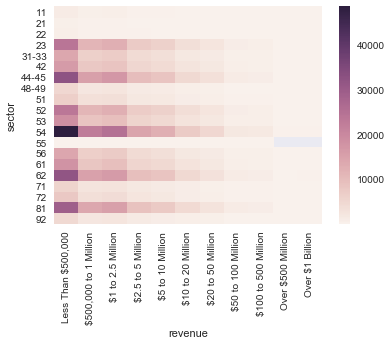

In [106]:
import matplotlib.pyplot as plt
aa_plot = sns.heatmap(aa)
plt.savefig("/Users/yumingfang/Downloads/output.png")

- State segment:  distribution of industry by state
- it would be helpful for small business owners to know what are the industry segments look like in their state, is there any potential markets in other state
- as we can see, most of the states are very centered for Professional, Scientific, and Technical Services(54), Health Care and Social Assistance(62), retail and trade (44-45), and other services(81)

In [141]:
temp_st = temp_nac[temp_nac.state.str.contains(pat ='[A-Za-z]', na = False)]
temp_st = temp_st[~temp_st.state.isin(['none', 'null'])]
aa = temp_st.pivot_table(values='name', index='state', columns='sector', 
                         aggfunc=lambda x: len(x.unique()))
aa = aa.fillna(0)
aa['total'] = aa.apply(lambda x: x.sum(), axis = 1)
aa = aa.apply(lambda x: x/x['total'] * 100, axis = 1)
del aa['total']
aa = aa.round(2)

In [142]:
aa

sector,11,21,22,23,31-33,42,44-45,48-49,51,52,53,54,55,56,61,62,71,72,81,92
state,,,,,,,,,,,,,,,,,,,,
AK,0.41,0.14,0.23,7.06,4.39,5.75,10.23,2.13,2.67,8.46,6.02,16.83,0.14,4.03,6.20,10.09,1.72,2.35,9.73,1.45
AL,0.43,0.21,0.27,7.65,4.89,5.58,10.54,1.45,2.38,7.66,6.10,15.61,0.03,4.85,6.41,10.67,1.60,2.52,9.68,1.47
AR,0.49,0.18,0.23,8.38,4.24,5.74,10.39,1.58,2.32,8.40,5.91,15.85,0.06,4.73,5.88,10.70,1.66,2.41,9.44,1.40
AZ,0.31,0.20,0.24,7.72,4.60,5.52,10.71,1.61,2.11,7.76,6.14,16.61,0.04,4.75,5.68,10.48,1.86,2.45,9.79,1.41
CA,0.40,0.19,0.27,7.93,4.47,5.51,10.76,1.57,2.26,7.81,6.07,16.01,0.05,4.66,5.95,10.60,1.86,2.55,9.62,1.47
CO,0.34,0.16,0.24,8.08,4.58,5.50,10.82,1.47,2.09,7.82,6.08,16.30,0.08,4.50,5.96,10.23,1.88,2.33,10.09,1.44
CT,0.38,0.21,0.25,8.13,4.63,5.45,10.58,1.43,2.28,7.68,6.23,16.37,0.03,4.68,6.00,10.33,1.83,2.38,9.78,1.34
DC,0.48,0.18,0.23,7.98,5.03,5.16,10.49,1.43,2.05,7.68,6.21,16.67,0.08,4.93,6.23,10.89,1.45,2.33,8.86,1.65
DE,0.55,0.20,0.16,8.49,4.58,5.88,10.98,1.58,2.21,6.95,6.24,14.61,0.08,4.97,6.44,10.19,1.74,2.17,10.11,1.89


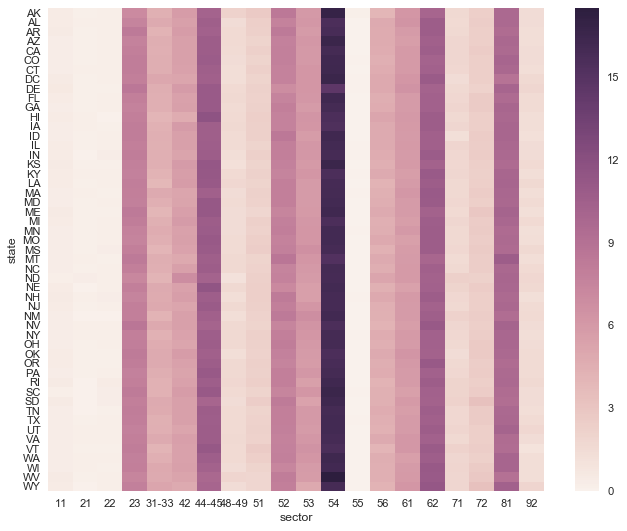

In [143]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(aa)